# Covid-19 data

The covid data is requested using the Covid-19 API: https://covid19api.com/

In [1]:
# Import dependencies
import requests
import csv
import json
import pandas as pd
from pprint import pprint
import datetime
from datetime import datetime
from datetime import timedelta, date
import matplotlib.pyplot as plt
import scipy.stats as sts

In [ ]:
# Make request to retrieve the country slug for Australia, for per country requests
url = "https://api.covid19api.com/countries"
response_json = requests.get(url).json()

for response in range(len(response_json)):
    if response_json[response]['Country'] == "Australia":
        aus_response = response_json[response]
    
print(aus_response)    

In [ ]:
# Covid-19 API request for Australia, case status includes active, confirmed, deaths, recovered
# Build URL
url = "https://api.covid19api.com/country/australia?from=2020-03-01T00:00:00Z&to=2020-09-05T00:00:00Z"

# Make request
response = requests.get(url)

# Convert to json
cases_response = response.json()

# Use list comprehension to get case numbers
state = [case_number["Province"] for case_number in cases_response]
date = [case_number["Date"] for case_number in cases_response]
confirmed = [case_number["Confirmed"] for case_number in cases_response]
active = [case_number["Active"] for case_number in cases_response]
deaths = [case_number["Deaths"] for case_number in cases_response]

# Create dataframe and include month column and set to the month specified in url 
covid_df = pd.DataFrame({
         "State": state,
         "Date": date, 
         "Confirmed (cumulative)": confirmed,
         "Active": active,
         "Deaths": deaths      
 }) 

# Write to csv
covid_df.to_csv("covid_data.csv", index=False, header=True)

In [2]:
# Read in csv
covid_df = pd.read_csv("covid_data.csv") 

# Display dataframe
covid_df.head()

,State,Date,Confirmed (cumulative),Active,Deaths
0,Western Australia,2020-03-01T00:00:00Z,2,1,1
1,Australian Capital Territory,2020-03-01T00:00:00Z,0,0,0
2,New South Wales,2020-03-01T00:00:00Z,6,2,0
3,Northern Territory,2020-03-01T00:00:00Z,0,0,0
4,Queensland,2020-03-01T00:00:00Z,9,8,0


In [4]:
# Check that we have all the States for Australia
covid_df["State"].unique()

array(['Western Australia', 'Australian Capital Territory',
       'New South Wales', 'Northern Territory', 'Queensland',
       'South Australia', 'Tasmania', 'Victoria'], dtype=object)

In [5]:
# Convert 'Date' column to datetime format
covid_df["datetime"] = pd.to_datetime(covid_df["Date"])

# Use dt to get the date part only
covid_df["date"] = covid_df["datetime"].dt.date

In [6]:
# Drop date columns
covid_df.drop(columns=["Date", "datetime"],inplace=True)
covid_df.head()

,State,Confirmed (cumulative),Active,Deaths,date
0,Western Australia,2,1,1,2020-03-01
1,Australian Capital Territory,0,0,0,2020-03-01
2,New South Wales,6,2,0,2020-03-01
3,Northern Territory,0,0,0,2020-03-01
4,Queensland,9,8,0,2020-03-01


### Victoria

In [9]:
# Loop through dates and get the active cases for each week
# Set up list to hold active cases                                   
vic_active_cases = []
week_ending = []

# Set end dates for while loop
end_date = datetime(2020,9,8).date()
week_start_date = datetime(2020,3,1).date()
week_end_date = datetime(2020,3,7).date()

while week_end_date < end_date:
    
    # Set conditions on df
    week_rows_vic = covid_df[(covid_df["date"] >= week_start_date) &
                             (covid_df["date"] <= week_end_date) & 
                             (covid_df["State"] == "Victoria")] 
    
    # Get the active cases and append to list
    vic_active_cases.append(week_rows_vic["Active"].mean())
    week_ending.append(week_end_date)
        
    # Add 7 days to start and end date range
    week_start_date = week_start_date + timedelta(days=7)
    week_end_date = week_end_date + timedelta(days=7)   

# Create df
vic_df = pd.DataFrame({"Vic Active": vic_active_cases, 
                       "Week ending": week_ending})

In [10]:
# Calculate percentage change in active cases and add as new column to df
vic_df["diff"] = vic_df["Vic Active"].diff()
vic_df["percentage"] = (vic_df["diff"]/vic_df["Vic Active"])*100
vic_df = vic_df.dropna()
vic_df.head()

,Vic Active,Week ending,diff,percentage
1,17.142857,2020-03-14,13.000000,75.833333
2,108.285714,2020-03-21,91.142857,84.168865
3,358.857143,2020-03-28,250.571429,69.824841
4,604.857143,2020-04-04,246.000000,40.670761
5,475.571429,2020-04-11,-129.285714,-27.185341


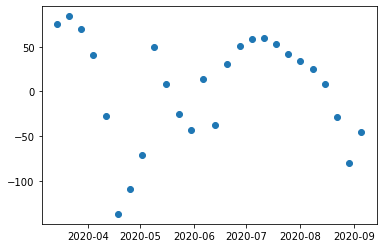

In [11]:
# Create a scatterplot of percentage change in active cases
x_values = vic_df["Week ending"]
y_values = vic_df["percentage"]
plt.scatter(x_values, y_values)

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot.scatter(x_values,regress_values, "r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.xlabel('Week ending')
# plt.ylabel("Mean of active cases")
# print(f"The r-squared is: {rvalue**2}")

### Western Australia

In [15]:
# Loop through dates and get the active cases for each week
# Set up list to hold active cases                                   
wa_active_cases = []
week_ending = []

# Set end dates for while loop
end_date = datetime(2020,9,8).date()
week_start_date = datetime(2020,3,1).date()
week_end_date = datetime(2020,3,7).date()

while week_end_date < end_date:
    
    # Set conditions on df
    week_rows_wa = covid_df[(covid_df["date"] >= week_start_date) &
                             (covid_df["date"] <= week_end_date) & 
                             (covid_df["State"] == "Western Australia")] 
    
    # Get the active cases and append to list
    wa_active_cases.append(week_rows_wa["Active"].mean())
    week_ending.append(week_end_date)
        
    # Add 7 days to start and end date range
    week_start_date = week_start_date + timedelta(days=7)
    week_end_date = week_end_date + timedelta(days=7) 

# Create df
wa_df = pd.DataFrame({"WA Active": wa_active_cases, 
                       "Week ending": week_ending})

In [17]:
# Calculate percentage change in active cases and add as new column to df
wa_df["diff"] = wa_df["WA Active"].diff()
wa_df["percentage"] = (wa_df["diff"]/wa_df["WA Active"])*100
wa_df = wa_df.dropna()
wa_df.head()

,WA Active,Week ending,diff,percentage
1,7.857143,2020-03-14,6.428571,81.818182
2,44.285714,2020-03-21,36.428571,82.258065
3,187.000000,2020-03-28,142.714286,76.317800
4,319.714286,2020-04-04,132.714286,41.510277
5,309.571429,2020-04-11,-10.142857,-3.276419


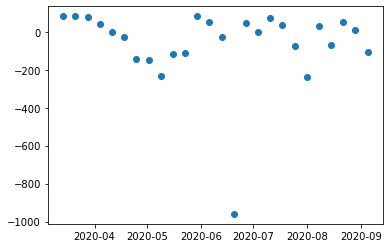

In [18]:
# Create a scatterplot of percentage change in active cases
x_values = wa_df["Week ending"]
y_values = wa_df["percentage"]
plt.scatter(x_values, y_values)
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot.scatter(x_values,regress_values, "r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.xlabel('Week ending')
# plt.ylabel("Mean of active cases")
# print(f"The r-squared is: {rvalue**2}")

### Queensland

In [22]:
# Loop through dates and get the active cases for each week
# Set up list to hold active cases                                   
qld_active_cases = []
week_ending = []

# Set end dates for while loop
end_date = datetime(2020,9,8).date()
week_start_date = datetime(2020,3,1).date()
week_end_date = datetime(2020,3,7).date()

while week_end_date < end_date:
    
    # Set conditions on df
    week_rows_qld = covid_df[(covid_df["date"] >= week_start_date) &
                             (covid_df["date"] <= week_end_date) & 
                             (covid_df["State"] == "Queensland")] 
    
    # Get the active cases and append to list
    qld_active_cases.append(week_rows_qld["Active"].mean())
    week_ending.append(week_end_date)
        
    # Add 7 days to start and end date range
    week_start_date = week_start_date + timedelta(days=7)
    week_end_date = week_end_date + timedelta(days=7)  
    
# Create df
qld_df = pd.DataFrame({"Qld Active": qld_active_cases, 
                       "Week ending": week_ending})

In [24]:
# Calculate percentage change in active cases and add as new column to df
qld_df["diff"] = qld_df["Qld Active"].diff()
qld_df["percentage"] = (qld_df["diff"]/qld_df["Qld Active"])*100
qld_df["percentage"] = (qld_df["diff"]/qld_df["Qld Active"])*100
qld_df = qld_df.dropna()
qld_df.head()

,Qld Active,Week ending,diff,percentage
1,16.142857,2020-03-14,8.857143,54.867257
2,113.428571,2020-03-21,97.285714,85.768262
3,433.142857,2020-03-28,319.714286,73.812665
4,771.571429,2020-04-04,338.428571,43.862248
5,707.428571,2020-04-11,-64.142857,-9.067044


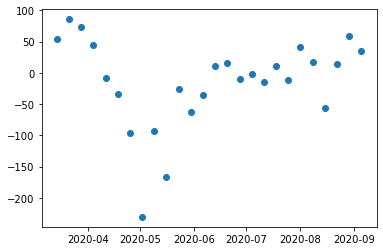

In [25]:
# Create a scatterplot of percentage change in active cases
x_values = qld_df["Week ending"]
y_values = qld_df["percentage"]
plt.scatter(x_values, y_values)

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot.scatter(x_values,regress_values, "r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.xlabel('Week ending')
# plt.ylabel("Mean of active cases")
# print(f"The r-squared is: {rvalue**2}")